In [93]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [94]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [95]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("data.csv",nrows=5000)

(5000, 400)


In [96]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

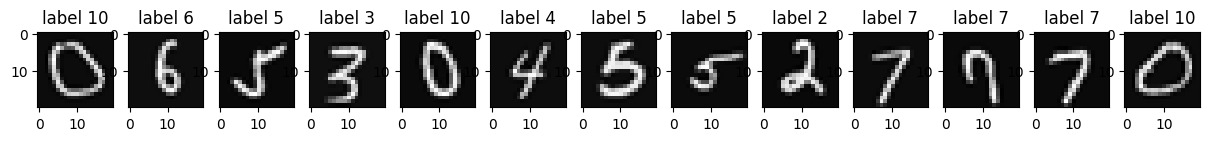

In [97]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

In [98]:
df.describe()

,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,...,13.211,13.212,13.213,13.214,13.215,13.216,13.217,13.218,13.219,13.220
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000
mean,12.095819,12.095819,12.095819,12.095219,12.095219,12.123025,12.130226,12.114623,12.101020,12.105821,...,12.079616,12.099620,12.127626,12.104621,12.097620,12.101220,12.09802,12.096419,12.095619,12.095819
std,2.694128,2.694128,2.694128,2.694335,2.695597,3.172112,3.171572,2.921520,2.847884,2.812716,...,2.764764,3.015844,3.465100,3.287732,2.865058,2.897916,2.71598,2.694886,2.694172,2.694128
min,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,6.00000,6.000000,6.000000,6.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
50%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000
75%,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000
max,28.000000,28.000000,28.000000,28.000000,28.000000,127.000000,118.000000,71.000000,69.000000,64.000000,...,34.000000,66.000000,103.000000,118.000000,58.000000,77.000000,29.00000,28.000000,28.000000,28.000000


In [109]:
#Performance metrics
global TP,TN,FN,FP
def confusion_mat(actual , predicted,val):
    values = list(set(actual))
    True_ = values[val-1]
    global TP, TN, FN, FP
    TP=0
    TN=0
    FN=0
    FP=0
    for i in range(len(actual)):
        if(actual[i]==predicted[i]):
            if(actual[i]==True_):
                TP = TP+1
            else:
                TN = TN+1
        else :
            if(actual[i]==True_):
                FP = FP+1
            else:
                FN = FN+1
    print("TP-->"+str(TP)+" TN-->"+str(TN),"\nFP-->"+str(FP)+" FN-->"+str(FN))
def accuracy_func():
  return (TP + TN)/(TP + TN + FP + FN)
def Recall():
  return TP/(TP + FN)
def precision():
  return TP/(TP + FP)
def taxu_FP():
  return FP / (FP + TN)
def specificité():
  return TN / (TN + FP)

def courbe_roc1(actual , predicted ):
  fpr, tpr, thresholds = roc_curve(actual, predicted)
  roc_auc = auc(fpr, tpr)
  print("AUC =", roc_auc)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [110]:
#Normalization
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

In [113]:
#MVS
#Créer le modèle
model= svm.SVC(kernel='linear')
# entrainement
model.fit(Xt, Yt)
# Prediction
accuracy = 0
y_pred = model.predict(Xtt)
values = list(set(Ytt))
for i in range(len(values)):
  print("=========")
  print("Confusion matrix ta3 "+str(i))
  cm = confusion_mat(Ytt,y_pred,i+1)
  accuracy = accuracy + accuracy_func()
  Recall()
  precision()
  taxu_FP()
  specificité()
print("THE ACCURACY = "+str(accuracy/len(values)))
accuracy=0
#courbe_roc1(Ytt,y_pred)"""

Confusion matrix ta3 0
TP-->149 TN-->1219 
FP-->4 FN-->128
Confusion matrix ta3 1
TP-->123 TN-->1245 
FP-->16 FN-->116
Confusion matrix ta3 2
TP-->153 TN-->1215 
FP-->17 FN-->115
Confusion matrix ta3 3
TP-->133 TN-->1235 
FP-->14 FN-->118
Confusion matrix ta3 4
TP-->123 TN-->1245 
FP-->20 FN-->112
Confusion matrix ta3 5
TP-->140 TN-->1228 
FP-->10 FN-->122
Confusion matrix ta3 6
TP-->132 TN-->1236 
FP-->14 FN-->118
Confusion matrix ta3 7
TP-->135 TN-->1233 
FP-->17 FN-->115
Confusion matrix ta3 8
TP-->136 TN-->1232 
FP-->14 FN-->118
Confusion matrix ta3 9
TP-->144 TN-->1224 
FP-->6 FN-->126
THE ACCURACY = 0.9120000000000001


In [114]:
#KNN
from collections import Counter

def find_k_nearest_rows(Xt, Xtt, Yt, k):
    result = []
    for i in range(len(Xtt)):
        first_row_matrix1 = Xtt[i, :]
        # Calculate Euclidean distances between the i row of testing data and all rows of learning data
        distances = np.linalg.norm(Xt - first_row_matrix1, axis=1)
        # Find the indices of the k smallest distances
        nearest_row_indices = np.argsort(distances)[:k]
        predicted = [Yt[nearest_row_indices[j]] for j in range(k)]
        counter = Counter(predicted)
        vals  = [value for value, _ in counter.most_common()]
        result.append(vals[0])
    return result

# Call the function
pred_val = find_k_nearest_rows(Xt, Xtt, Yt, 2)
print("Index of nearest rows in Xtt:", pred_val)
values = list(set(Ytt))
for i in range(len(values)):
  print("=========")
  print("Confusion matrix ta3 "+str(i))
  cm = confusion_mat(Ytt,pred_val,i+1)
  accuracy = accuracy + accuracy_func()
  Recall()
  precision()
  taxu_FP()
  specificité()
print("THE ACCURACY = "+str(accuracy/len(values)))
accuracy=0

Index of nearest rows in Xtt: [7, 7, 3, 1, 4, 10, 1, 9, 3, 3, 5, 7, 3, 6, 6, 7, 1, 7, 3, 7, 4, 4, 2, 9, 1, 6, 7, 5, 10, 3, 3, 9, 8, 5, 3, 10, 9, 1, 1, 9, 3, 3, 9, 4, 8, 10, 2, 9, 3, 5, 8, 1, 1, 8, 5, 10, 5, 7, 8, 9, 9, 9, 7, 3, 10, 4, 1, 2, 7, 7, 9, 6, 2, 1, 1, 5, 8, 2, 3, 10, 8, 3, 9, 8, 8, 2, 2, 6, 9, 9, 8, 9, 8, 2, 7, 3, 1, 10, 2, 1, 1, 10, 5, 7, 4, 3, 4, 3, 1, 10, 8, 6, 6, 2, 5, 6, 3, 1, 10, 2, 5, 6, 9, 8, 3, 8, 7, 10, 3, 8, 8, 8, 7, 4, 9, 5, 4, 1, 10, 4, 8, 1, 4, 8, 2, 9, 5, 9, 6, 3, 8, 10, 10, 8, 8, 3, 1, 1, 7, 1, 9, 7, 6, 10, 3, 5, 9, 8, 5, 5, 10, 3, 1, 10, 7, 5, 1, 2, 5, 7, 3, 9, 9, 9, 1, 8, 6, 8, 7, 2, 9, 3, 9, 3, 2, 5, 2, 10, 6, 2, 3, 3, 3, 9, 10, 6, 3, 7, 8, 4, 3, 4, 1, 5, 3, 7, 6, 7, 7, 4, 5, 6, 10, 3, 2, 8, 3, 6, 7, 2, 8, 5, 9, 9, 4, 1, 6, 2, 1, 10, 9, 9, 1, 6, 5, 3, 2, 1, 8, 6, 3, 5, 4, 6, 6, 7, 2, 10, 7, 10, 3, 3, 1, 6, 6, 4, 5, 8, 10, 9, 10, 6, 1, 5, 3, 1, 8, 2, 7, 4, 7, 9, 8, 9, 7, 3, 1, 6, 10, 6, 10, 6, 3, 10, 10, 4, 6, 1, 1, 8, 2, 4, 8, 5, 8, 6, 3, 5, 8, 9, 6, 1, 1, 

1
Confusion matrix ta3 0
TP-->132 TN-->1006 
FP-->21 FN-->341
Confusion matrix ta3 1
TP-->90 TN-->1048 
FP-->49 FN-->313
Confusion matrix ta3 2
TP-->121 TN-->1017 
FP-->49 FN-->313
Confusion matrix ta3 3
TP-->115 TN-->1023 
FP-->32 FN-->330
Confusion matrix ta3 4
TP-->97 TN-->1041 
FP-->46 FN-->316
Confusion matrix ta3 5
TP-->111 TN-->1027 
FP-->39 FN-->323
Confusion matrix ta3 6
TP-->120 TN-->1018 
FP-->26 FN-->336
Confusion matrix ta3 7
TP-->101 TN-->1037 
FP-->51 FN-->311
Confusion matrix ta3 8
TP-->122 TN-->1016 
FP-->28 FN-->334
Confusion matrix ta3 9
TP-->129 TN-->1009 
FP-->21 FN-->341
THE ACCURACY = 0.7586666666666667


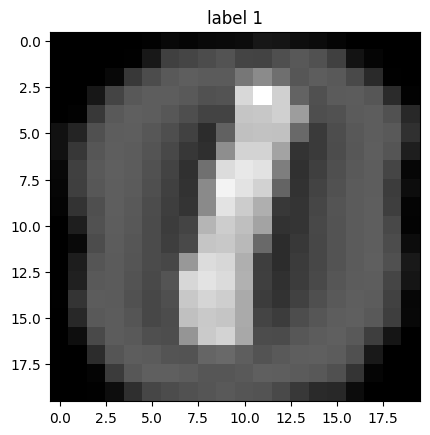

In [115]:
# Decesion Tree
model = DecisionTreeClassifier()
model = model.fit(Xt, Yt)
y_pred = model.predict(Xtt)
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')
values = list(set(Ytt))
for i in range(len(values)):
  print("=========")
  print("Confusion matrix ta3 "+str(i))
  cm = confusion_mat(Ytt,y_pred,i+1)
  accuracy = accuracy + accuracy_func()
  Recall()
  precision()
  taxu_FP()
  specificité()
print("THE ACCURACY = "+str(accuracy/len(values)))
accuracy=0

Confusion matrix ta3 0
TP-->0 TN-->592 
FP-->351 FN-->2557
Confusion matrix ta3 1
TP-->0 TN-->592 
FP-->354 FN-->2554
Confusion matrix ta3 2
TP-->0 TN-->592 
FP-->358 FN-->2550
Confusion matrix ta3 3
TP-->0 TN-->592 
FP-->338 FN-->2570
Confusion matrix ta3 4
TP-->0 TN-->592 
FP-->351 FN-->2557
Confusion matrix ta3 5
TP-->0 TN-->592 
FP-->343 FN-->2565
Confusion matrix ta3 6
TP-->239 TN-->353 
FP-->111 FN-->2797
Confusion matrix ta3 7
TP-->0 TN-->592 
FP-->350 FN-->2558
Confusion matrix ta3 8
TP-->0 TN-->592 
FP-->351 FN-->2557
Confusion matrix ta3 9
TP-->353 TN-->239 
FP-->1 FN-->2907
THE ACCURACY = 0.16914285714285712


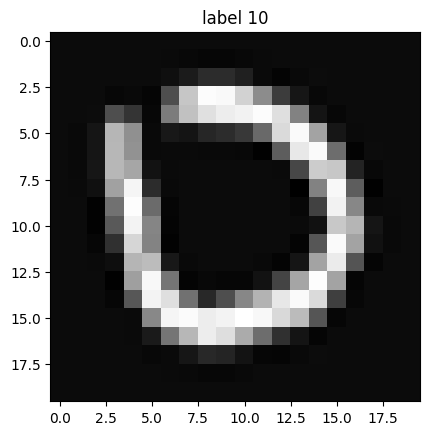

In [116]:
#RN
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)
# Choisir un image de test
c=0
y_pred = model.predict(Xtt)
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')
values = list(set(Ytt))
for i in range(len(values)):
  print("=========")
  print("Confusion matrix ta3 "+str(i))
  cm = confusion_mat(Ytt,y_pred,i+1)
  accuracy = accuracy + accuracy_func()
  Recall()
  precision()
  taxu_FP()
  specificité()
print("THE ACCURACY = "+str(accuracy/len(values)))
accuracy=0